## Nesse capítulo vou explorar o método de otimização de hiperparâmetros chamado de Grid Search.
### Esse método basicamente testa todas as combinações que o usuário fornecer para cada modelo.

### Vantagens do Grid Search são:
1. O modelo escolhido é o melhor dentre todos os testados. Pórem, os hiperparâmetros dados têm que serem bons para os modelos terem uma performance boa.
2. Bem fácil de explicar

### Desvantagens do Grid Search:
1. É computacionalmente muito caro testar todas as combinações dos hiperparâmetros que você fornecer. Normalmente fazemos uma validação cruzada para cada combinação e o número de combinações possíveis fica alto muito facilmente.
2. As performances não melhoram a cada combinação de hiperparâmetros diferentes

## Felizmente existe uma função no scikit learn que faz todo esse processo. Vou detalhar os passos que precisamos fazer para executar a função do Grid Search:

1. Um algoritmo de machine learning para otimizar os hiperparâmetros
2. Definir quais hiperparâmetros vamos otimizar
3. Definir os valores dos hiperparâmetros possíveis
4. Escolher o método de validação cruzada
5. Definir a métrica de performance

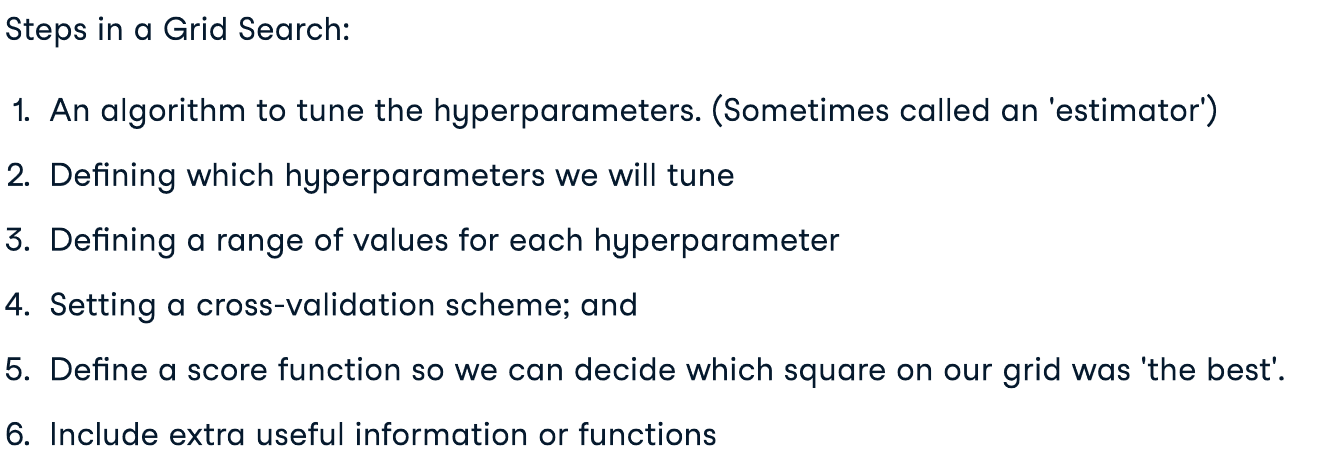

## Os argumentos da função mais importantes são:
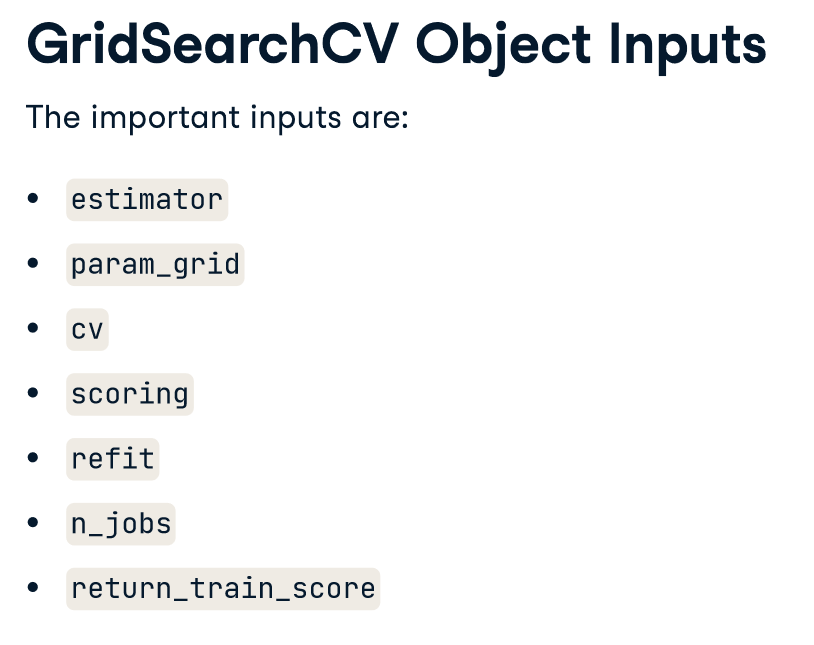

### O argumento estimator é o modelo de machine learning que será utilizado:
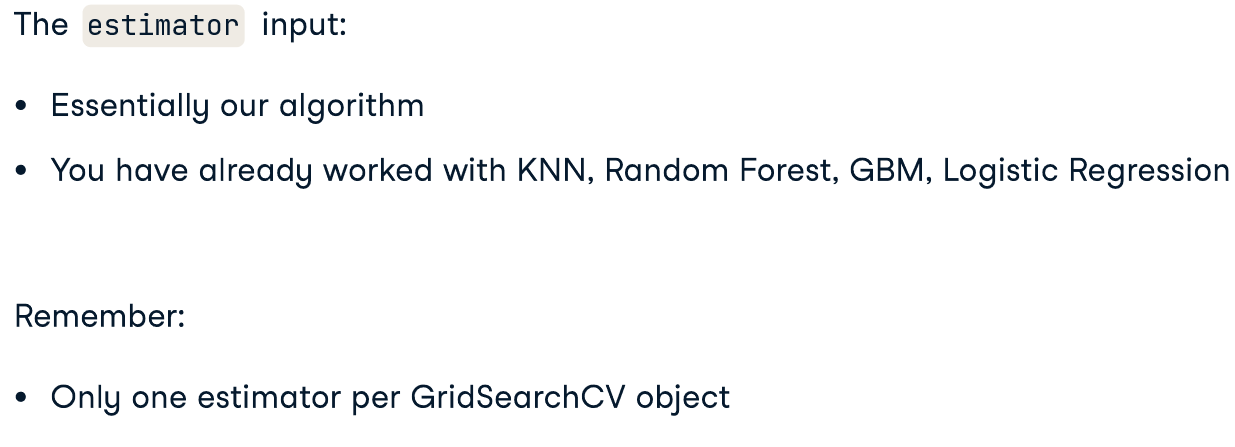

### O argumento param_grid é um dicionário, onde as chaves são os nomes dos hiperparâmetros e os valores são os hiperparâmetros que serão testado no Grid Search.
### Por exemplo:
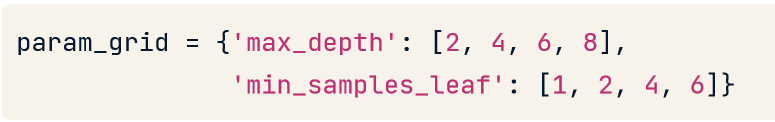


### O argumento cv é o tipo de validação cruzada a ser utilizada:
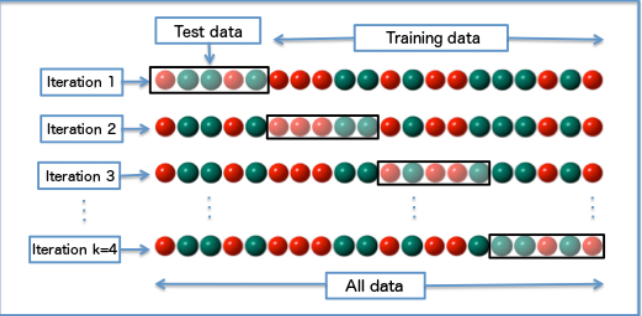

### O argumento scoring é a métrica que a ser otimizada. Por exemplo: precision, recall, accuracy, roc-auc, entre outras.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from itertools import product

In [3]:
dados=pd.read_csv("../dados/credit-card-full.csv")[:1000]

In [4]:
dados.drop(["ID"], axis=1, inplace=True)

In [5]:
dados.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
X=dados.drop(["default payment next month"], axis=1)
y=dados["default payment next month"]

In [7]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, test_size=0.5)

In [8]:
# Create the grid
param_grid = {'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 4]}
#Get a base classifier with some set parameters.
rf_class = RandomForestClassifier(criterion='entropy', max_features='auto')

In [9]:
grid_rf_class = GridSearchCV(
estimator = rf_class,
param_grid = param_grid,
scoring='precision',
cv = 3)

In [10]:
grid_rf_class.fit(X_treino, y_treino)

GridSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 4]},
             scoring='precision')

## Existem alguns componentes importantes no Grid Search: Resultados(atributo cv_results_, melhor combinação de hiperparâmetros(best_params_) e melhor score(best_score_)

In [11]:
grid_rf_class.cv_results_

{'mean_fit_time': array([0.14698807, 0.12590949, 0.13554947, 0.1594673 , 0.15523458,
        0.17275794, 0.16745035, 0.16079481, 0.15647403]),
 'std_fit_time': array([0.01054829, 0.00496948, 0.00372752, 0.00704555, 0.00461255,
        0.0121915 , 0.00913354, 0.00682661, 0.00585775]),
 'mean_score_time': array([0.01494892, 0.01229262, 0.01494853, 0.01461999, 0.01394526,
        0.01561443, 0.0146331 , 0.01428564, 0.01329645]),
 'std_score_time': array([0.0021524 , 0.00046985, 0.0021527 , 0.00047183, 0.00079842,
        0.00094516, 0.00096269, 0.00047013, 0.00124915]),
 'param_max_depth': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 2, 4, 1, 2, 4, 1, 2, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
 

In [12]:
grid_rf_class.best_params_

{'max_depth': 2, 'min_samples_leaf': 4}

In [13]:
grid_rf_class.best_score_

0.8166666666666668

In [14]:
grid_rf_class.cv_results_["mean_test_score"]

array([0.66666667, 0.67777778, 0.81666667, 0.63076923, 0.70707071,
       0.63492063, 0.64880952, 0.65873016, 0.67678571])

In [15]:
grid_rf_class.cv_results_["param_max_depth"]

masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object)

In [16]:
grid_rf_class.cv_results_["param_min_samples_leaf"]

masked_array(data=[1, 2, 4, 1, 2, 4, 1, 2, 4],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object)

### Agora vou mostrar uma maneira de realizar o grid search manualmente

In [19]:
# Criando os valores de dois hiperparâmetros do modelo Gradient Boosting
learn_rate_list = list(np.linspace(0.01,1.5,200))
min_samples_list = list(np.arange(10, 41))

In [20]:
print(learn_rate_list)
print(min_samples_list)

[0.01, 0.017487437185929648, 0.024974874371859294, 0.03246231155778895, 0.039949748743718594, 0.04743718592964824, 0.05492462311557789, 0.06241206030150754, 0.06989949748743718, 0.07738693467336683, 0.08487437185929647, 0.09236180904522612, 0.09984924623115578, 0.10733668341708542, 0.11482412060301507, 0.12231155778894472, 0.12979899497487438, 0.13728643216080402, 0.14477386934673367, 0.15226130653266332, 0.15974874371859296, 0.1672361809045226, 0.17472361809045225, 0.1822110552763819, 0.18969849246231157, 0.19718592964824122, 0.20467336683417087, 0.2121608040201005, 0.21964824120603016, 0.2271356783919598, 0.23462311557788945, 0.2421105527638191, 0.24959798994974874, 0.2570854271356784, 0.26457286432160804, 0.2720603015075377, 0.27954773869346733, 0.287035175879397, 0.2945226130653266, 0.30201005025125627, 0.3094974874371859, 0.31698492462311556, 0.3244723618090452, 0.33195979899497485, 0.3394472361809045, 0.34693467336683415, 0.3544221105527638, 0.36190954773869344, 0.369396984924623

In [21]:
# Criando todas as combinações dos hiperparâmetros
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

In [22]:
print(combinations_list)

[[0.01, 10], [0.01, 11], [0.01, 12], [0.01, 13], [0.01, 14], [0.01, 15], [0.01, 16], [0.01, 17], [0.01, 18], [0.01, 19], [0.01, 20], [0.01, 21], [0.01, 22], [0.01, 23], [0.01, 24], [0.01, 25], [0.01, 26], [0.01, 27], [0.01, 28], [0.01, 29], [0.01, 30], [0.01, 31], [0.01, 32], [0.01, 33], [0.01, 34], [0.01, 35], [0.01, 36], [0.01, 37], [0.01, 38], [0.01, 39], [0.01, 40], [0.017487437185929648, 10], [0.017487437185929648, 11], [0.017487437185929648, 12], [0.017487437185929648, 13], [0.017487437185929648, 14], [0.017487437185929648, 15], [0.017487437185929648, 16], [0.017487437185929648, 17], [0.017487437185929648, 18], [0.017487437185929648, 19], [0.017487437185929648, 20], [0.017487437185929648, 21], [0.017487437185929648, 22], [0.017487437185929648, 23], [0.017487437185929648, 24], [0.017487437185929648, 25], [0.017487437185929648, 26], [0.017487437185929648, 27], [0.017487437185929648, 28], [0.017487437185929648, 29], [0.017487437185929648, 30], [0.017487437185929648, 31], [0.01748743